In [1]:
"Workshop on DeepWalk Algorithm using Karate Club"

import networkx as nx
import matplotlib.pyplot as plt
from karateclub import DeepWalk
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Numer of nodes (club-members) 34


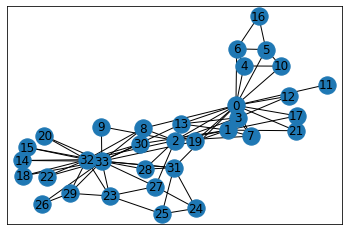

In [2]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print("Numer of nodes (club-members)", len(G.nodes))
nx.draw_networkx(G)
plt.show()

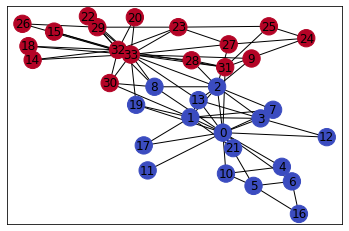

In [9]:
"plot graph with labels"
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) # Clubs: 'Officer' or 'Mr.Hi'

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos, node_color=labels, cmap='coolwarm')
plt.show()

In [5]:
"Perform node embedding using DeepWalk"
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features): ', embedding.shape)

Embedding array shape (nodes x features):  (34, 124)


low dimensional embedding representation (nodesx2):  [[ 1.3181572e+00 -2.9799625e-01]
 [ 4.2200196e-01 -8.5679483e-01]
 [ 2.3820563e-01 -1.5949640e-01]
 [ 1.3506485e+00 -5.8015913e-01]
 [ 2.1041148e+00  7.4317479e-01]
 [ 3.1113870e+00  9.2132568e-01]
 [ 2.7346711e+00  8.2447332e-01]
 [ 7.9763961e-01 -8.9787149e-01]
 [-9.4937557e-01 -3.0029595e-01]
 [-6.0388964e-01 -4.6014455e-01]
 [ 2.6503496e+00  7.1477467e-01]
 [ 1.4174274e+00 -8.2330573e-01]
 [ 1.2823535e+00 -3.9392415e-01]
 [ 3.5096508e-01 -9.4453424e-01]
 [-1.5592829e+00 -3.1061652e-01]
 [-1.8058356e+00  4.7781679e-01]
 [ 2.4046836e+00  7.8064007e-01]
 [ 7.5371546e-01 -6.2412643e-01]
 [-1.5725158e+00 -1.6192502e-01]
 [ 3.0265129e-01 -5.1813614e-01]
 [-6.7255157e-01 -1.1147275e-04]
 [ 1.1532674e+00 -8.1115782e-01]
 [-1.4246628e+00 -2.0640245e-01]
 [-1.8639866e+00  5.8938164e-01]
 [-1.5485491e+00  9.4897991e-01]
 [-1.0238992e+00  9.8374665e-01]
 [-1.4134202e+00 -2.3734307e-02]
 [-9.0577096e-01  3.5454050e-01]
 [-9.1798365e-01  1.351

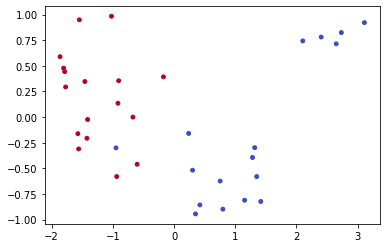

In [6]:
"Low Dimensional plot of the nodes x features"
PCA_model = sklearn.decomposition.PCA(n_components=2)
low_dimension_embedding = PCA_model.fit_transform(embedding)
print('low dimensional embedding representation (nodesx2): ', low_dimension_embedding)
plt.scatter(low_dimension_embedding[:,0], low_dimension_embedding[:,1], c=labels, s=15, cmap='coolwarm')

In [7]:
"Node Classification using embedded model"
x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test, y_predict)
print('AUC: ', ML_acc)

AUC:  0.9
